In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/068270.KS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-06,170588.0,172059.0,169118.0,169608.0,169608.0,586594
1,2020-01-07,171078.0,175490.0,170588.0,174510.0,174510.0,466518
2,2020-01-08,171569.0,172549.0,167157.0,169608.0,169608.0,908942
3,2020-01-09,174510.0,175980.0,171569.0,173529.0,173529.0,529951
4,2020-01-10,175000.0,175000.0,171569.0,174020.0,174020.0,439749


In [ ]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [ ]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [ ]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((176, 50, 1), (20, 50, 1))

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
18/18 [==============================] - 5s 90ms/step - loss: 0.0182 - val_loss: 0.0088
Epoch 2/20
18/18 [==============================] - 1s 48ms/step - loss: 0.0080 - val_loss: 0.0095
Epoch 3/20
18/18 [==============================] - 1s 49ms/step - loss: 0.0064 - val_loss: 0.0039
Epoch 4/20
18/18 [==============================] - 1s 48ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 5/20
18/18 [==============================] - 1s 52ms/step - loss: 0.0046 - val_loss: 0.0034
Epoch 6/20
18/18 [==============================] - 1s 45ms/step - loss: 0.0041 - val_loss: 0.0030
Epoch 7/20
18/18 [==============================] - 1s 45ms/step - loss: 0.0033 - val_loss: 0.0138
Epoch 8/20
18/18 [==============================] - 1s 48ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 9/20
18/18 [==============================] - 1s 44ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 10/20
18/18 [==============================] - 1s 52ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 11/

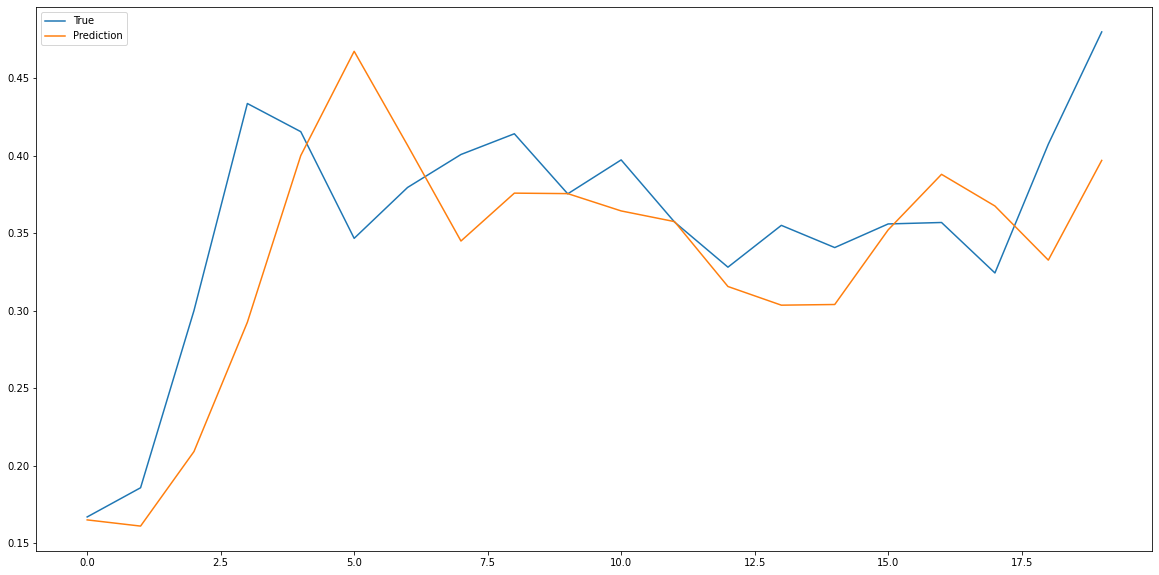

In [ ]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()
